In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
# pip install tensorflow

from tensorflow import keras
from tensorflow.keras.models import save_model
from keras.models import Sequential
from keras.layers import Dense
from sklearn.metrics import accuracy_score

In [2]:
#pip install tensorflow

## Module 1 - Data Acquisition & Preprocessing

In [3]:
data=pd.read_csv('diabetes_data.csv')
data

,Age,Sex,HighChol,CholCheck,BMI,Smoker,HeartDiseaseorAttack,PhysActivity,Fruits,Veggies,HvyAlcoholConsump,GenHlth,MentHlth,PhysHlth,DiffWalk,Stroke,HighBP,Diabetes
0,4.0,1.0,0.0,1.0,26.0,0.0,0.0,1.0,0.0,1.0,0.0,3.0,5.0,30.0,0.0,0.0,1.0,0.0
1,12.0,1.0,1.0,1.0,26.0,1.0,0.0,0.0,1.0,0.0,0.0,3.0,0.0,0.0,0.0,1.0,1.0,0.0
2,13.0,1.0,0.0,1.0,26.0,0.0,0.0,1.0,1.0,1.0,0.0,1.0,0.0,10.0,0.0,0.0,0.0,0.0
3,11.0,1.0,1.0,1.0,28.0,1.0,0.0,1.0,1.0,1.0,0.0,3.0,0.0,3.0,0.0,0.0,1.0,0.0
4,8.0,0.0,0.0,1.0,29.0,1.0,0.0,1.0,1.0,1.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
70687,6.0,0.0,1.0,1.0,37.0,0.0,0.0,0.0,0.0,1.0,0.0,4.0,0.0,0.0,0.0,0.0,0.0,1.0
70688,10.0,1.0,1.0,1.0,29.0,1.0,1.0,0.0,1.0,1.0,0.0,2.0,0.0,0.0,1.0,0.0,0.0,1.0
70689,13.0,0.0,1.0,1.0,25.0,0.0,1.0,0.0,1.0,0.0,0.0,5.0,15.0,0.0,1.0,0.0,1.0,1.0
70690,11.0,0.0,1.0,1.0,18.0,0.0,0.0,0.0,0.0,0.0,0.0,4.0,0.0,0.0,1.0,0.0,1.0,1.0


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 70692 entries, 0 to 70691
Data columns (total 18 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Age                   70692 non-null  float64
 1   Sex                   70692 non-null  float64
 2   HighChol              70692 non-null  float64
 3   CholCheck             70692 non-null  float64
 4   BMI                   70692 non-null  float64
 5   Smoker                70692 non-null  float64
 6   HeartDiseaseorAttack  70692 non-null  float64
 7   PhysActivity          70692 non-null  float64
 8   Fruits                70692 non-null  float64
 9   Veggies               70692 non-null  float64
 10  HvyAlcoholConsump     70692 non-null  float64
 11  GenHlth               70692 non-null  float64
 12  MentHlth              70692 non-null  float64
 13  PhysHlth              70692 non-null  float64
 14  DiffWalk              70692 non-null  float64
 15  Stroke             

## Checking if the dataset contains NULL values

In [5]:
#missing/null values

data.isnull().sum()

Age                     0
Sex                     0
HighChol                0
CholCheck               0
BMI                     0
Smoker                  0
HeartDiseaseorAttack    0
PhysActivity            0
Fruits                  0
Veggies                 0
HvyAlcoholConsump       0
GenHlth                 0
MentHlth                0
PhysHlth                0
DiffWalk                0
Stroke                  0
HighBP                  0
Diabetes                0
dtype: int64

#### No null values - No need of filling missing values

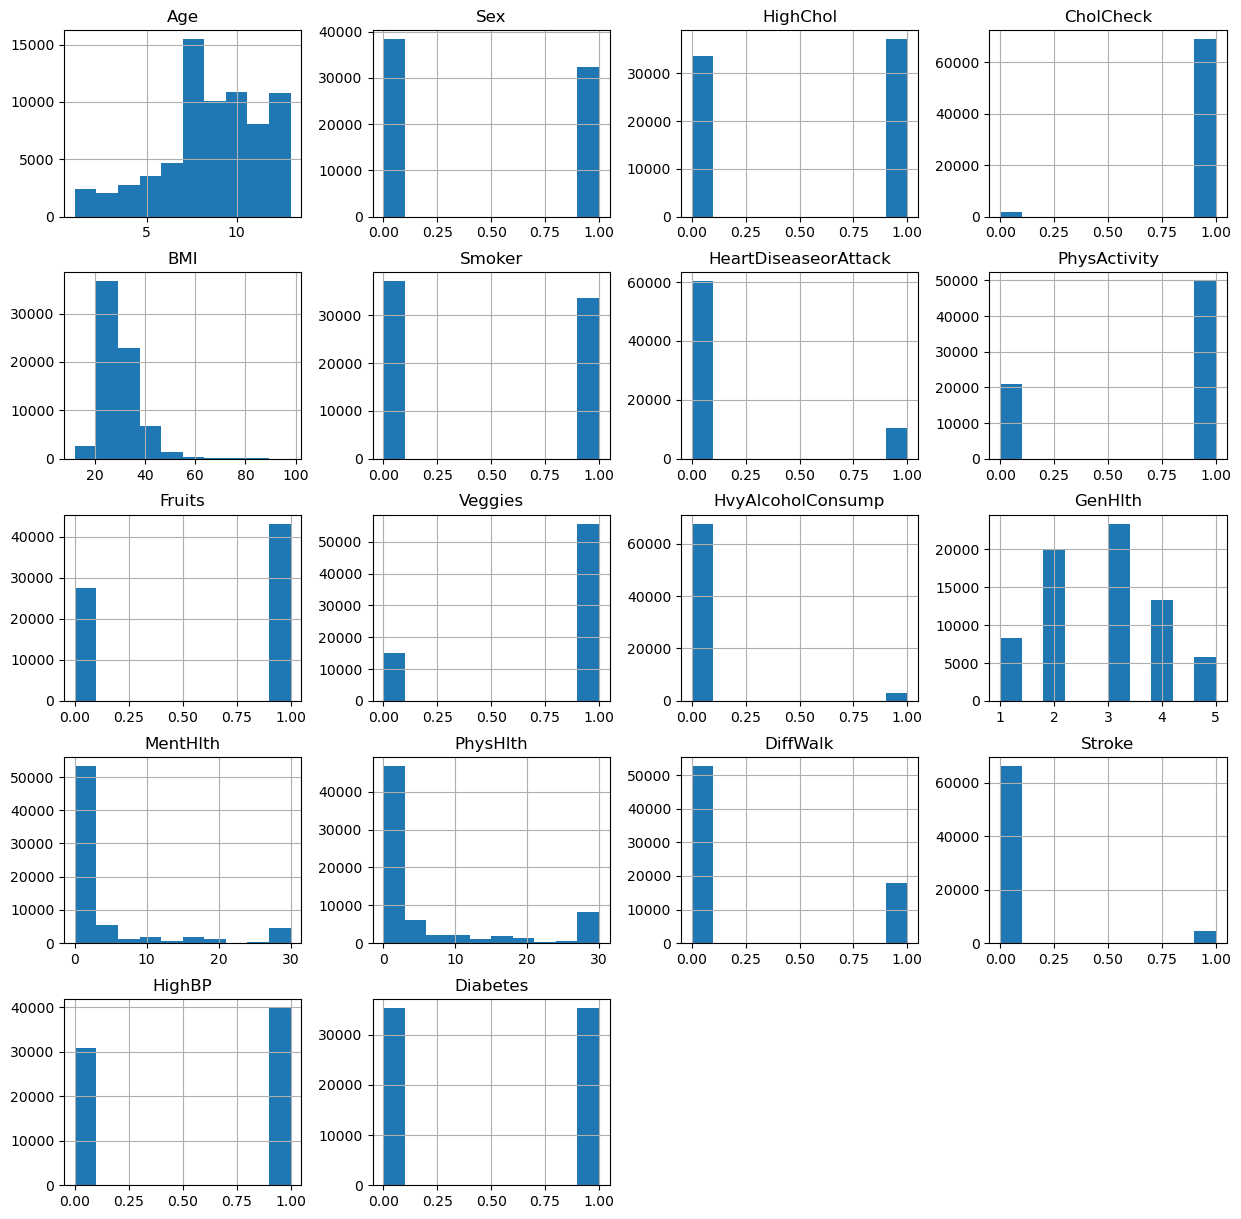

In [6]:
data.hist(bins=10,figsize=(15,15))
plt.show()

<AxesSubplot:>

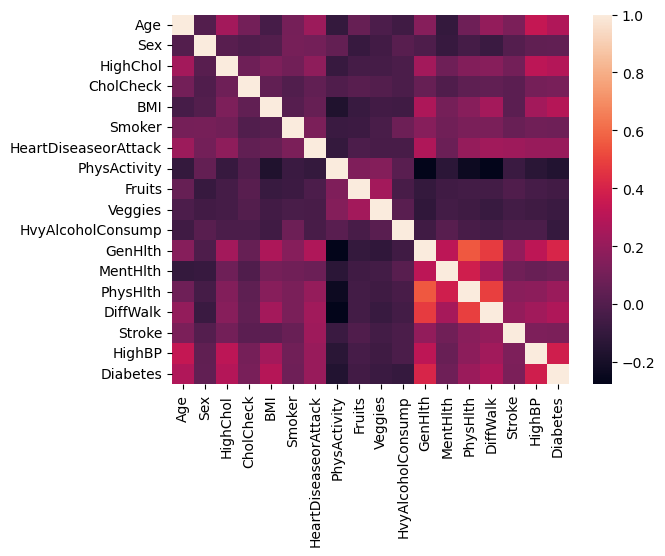

In [7]:
sns.heatmap(data.corr())

<AxesSubplot:xlabel='count', ylabel='Diabetes'>

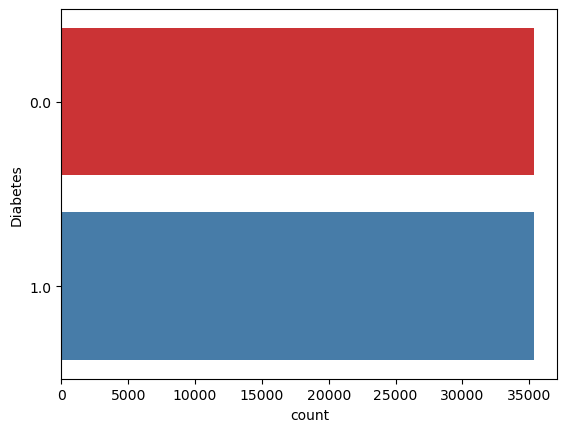

In [8]:
sns.countplot(y=data['Diabetes'],palette='Set1')

<AxesSubplot:>

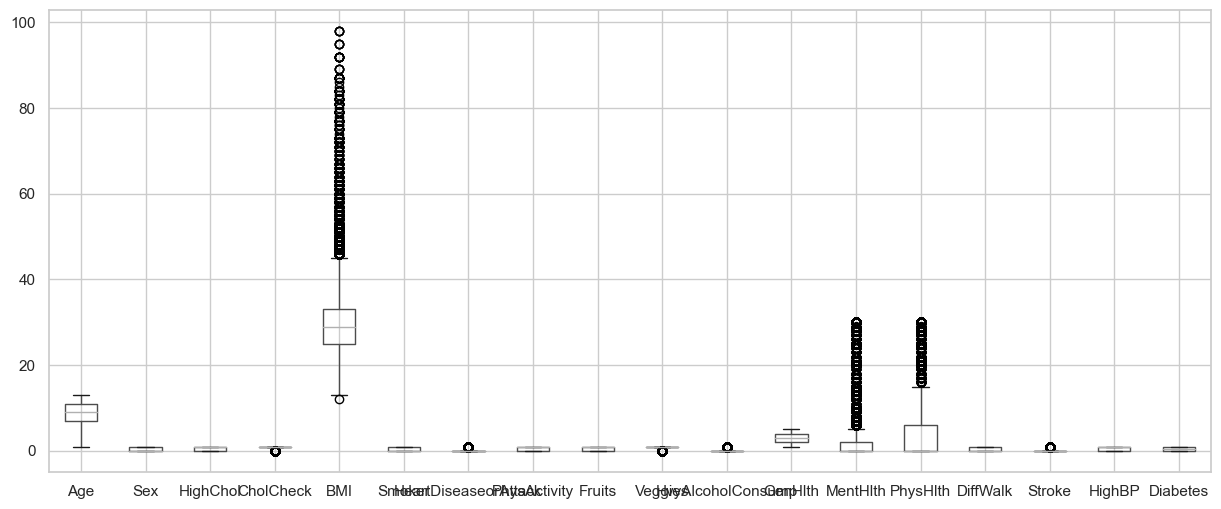

In [9]:
sns.set(style="whitegrid")
data.boxplot(figsize=(15,6))

## Outliers Removal - Z-score technique

In [10]:
# define a function to remove outliers using the z-score method
def remove_outliers(data, z_thresh):
    # calculate z-scores for each column
    z_scores = np.abs((data - data.mean()) / data.std())
    # keep rows where all z-scores are less than the threshold
    return data[(z_scores < z_thresh).all(axis=1)]

# set the z-score threshold for outlier removal
z_thresh = 3

# apply the remove_outliers function to the dataset
data_out = remove_outliers(data, z_thresh)


In [11]:
data.shape

(70692, 18)

In [12]:
data.shape,data_out.shape

((70692, 18), (57682, 18))

In [13]:
# #diabetes_dataset

# data_out = data[~((data < (Q1 - 1.5 * IQR)) |(data > (Q3 + 1.5 * IQR))).any(axis=1)]
# data.shape,data_out.shape

In [14]:
# print(data_out[data_out['Diabetes'] == 0])


<AxesSubplot:xlabel='count', ylabel='Diabetes'>

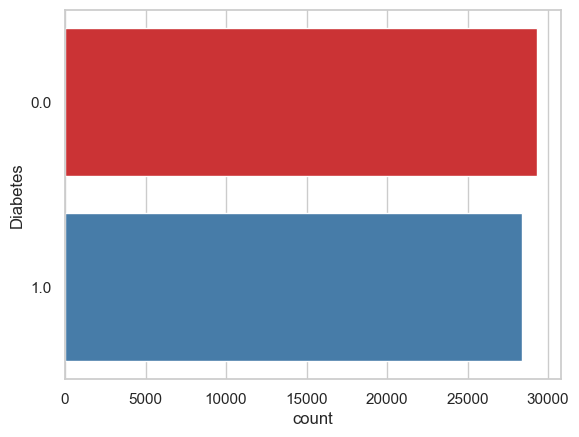

In [15]:
sns.countplot(y=data_out['Diabetes'],palette='Set1')

## Module 2 - Data Preprocessing

### Feature Engineering

In [16]:
#diabetes_dataset

X=data_out.drop(columns=['Diabetes'])
y=data_out['Diabetes']
from sklearn.tree import DecisionTreeClassifier
import pandas as pd

# Create decision tree classifier with entropy as criterion
dtc = DecisionTreeClassifier(criterion='entropy')

# Train the classifier on the entire dataset
dtc.fit(X, y)

# Get the feature importances and calculate the entropy gains
feature_importances = dtc.feature_importances_
entropy_gains = []
for i, feature in enumerate(X.columns):
    entropy_gain = feature_importances[i] * dtc.tree_.impurity[dtc.tree_.feature[i]]
    entropy_gains.append((feature, entropy_gain))

# Print the entropy gains for all features
for feature, entropy_gain in sorted(entropy_gains, key=lambda x: x[1], reverse=True):
    print("{}: {:.3f}".format(feature, entropy_gain))

# train_X_norm
# test_X_norm

# def bp_group(row):
#     if row['Blood Pressure'] < 60:
#         return '0'
#     elif row['Blood Pressure'] > 60 and row['Blood Pressure'] < 80:
#         return '1'
#     elif row['Blood Pressure'] > 80 and row['Blood Pressure'] < 90:
#         return '2'
#     else:
#         return '3'

# X['bp'] = X.apply(bp_group,axis=1)

# def bmi_group(row):
#     if row['BMI'] < 18.5:
#         return '0'
#     elif row['BMI'] > 18.5 and row['BMI'] < 25:
#         return '1'
#     elif row['BMI'] > 25 and row['BMI'] < 30:
#         return '2'
#     elif row['BMI'] > 30 and row ['BMI'] < 40:
#         return '3'
#     else:
#         return '4'

# X['bmi_status'] = X.apply(bmi_group,axis=1)

# def age_group(row):
#     if row['Age'] < 30:
#         return '0'
#     elif row['Age'] > 30 and row['Age'] > 62:
#         return '1'
#     else:
#         return '2'

# X['age_group'] = X.apply(age_group,axis=1)

# def num_preg(row):
#     if row['Pregnancies'] < 2:
#         return '0'
#     elif row['Pregnancies'] > 2 and row['Pregnancies'] < 5:
#         return '1'
#     else:
#         return '2'
    
# X['num_preg'] = X.apply(num_preg,axis=1)

PhysHlth: 0.110
GenHlth: 0.097
Age: 0.074
BMI: 0.038
HighChol: 0.022
HeartDiseaseorAttack: 0.019
Smoker: 0.012
Sex: 0.009
Veggies: 0.007
DiffWalk: 0.004
CholCheck: 0.000
PhysActivity: 0.000
Fruits: 0.000
HvyAlcoholConsump: 0.000
MentHlth: 0.000
Stroke: 0.000
HighBP: 0.000


In [17]:
X = X.drop(columns=['HighBP' , 'Stroke' , 'MentHlth'])


#### Data after feature engineering

In [18]:
X.head()

,Age,Sex,HighChol,CholCheck,BMI,Smoker,HeartDiseaseorAttack,PhysActivity,Fruits,Veggies,HvyAlcoholConsump,GenHlth,PhysHlth,DiffWalk
0,4.0,1.0,0.0,1.0,26.0,0.0,0.0,1.0,0.0,1.0,0.0,3.0,30.0,0.0
2,13.0,1.0,0.0,1.0,26.0,0.0,0.0,1.0,1.0,1.0,0.0,1.0,10.0,0.0
3,11.0,1.0,1.0,1.0,28.0,1.0,0.0,1.0,1.0,1.0,0.0,3.0,3.0,0.0
4,8.0,0.0,0.0,1.0,29.0,1.0,0.0,1.0,1.0,1.0,0.0,2.0,0.0,0.0
5,1.0,0.0,0.0,1.0,18.0,0.0,0.0,1.0,1.0,1.0,0.0,2.0,0.0,0.0


### Data Splitting

In [19]:
train_X,test_X,train_y,test_y=train_test_split(X,y,test_size=0.3)
train_X.shape,test_X.shape,train_y.shape,test_y.shape

((40377, 14), (17305, 14), (40377,), (17305,))

### Data Normalisation

In [20]:
norm=MinMaxScaler().fit(train_X)
train_X_norm=norm.transform(train_X)
test_X_norm=norm.transform(test_X)

# Module 3 - SVM Model

In [21]:
import h5py
import numpy as np
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
import joblib

# Create SVM model
model = SVC(kernel='linear', C=0.5, gamma='auto')

# Train the model
model.fit(train_X_norm, train_y)

# Make predictions on the testing set
y_pred1 = model.predict(test_X_norm)

# Calculate accuracy score
accuracy = accuracy_score(test_y, y_pred1)
print("Accuracy: {:.2f}%".format(accuracy*100))

# make predictions on test data using your model

joblib.dump(model, 'svm.pkl')


# keras_model = Sequential()
# keras_model.add(Dense(1, input_dim=14, activation='sigmoid', use_bias=False))
# keras_model.layers[0].set_weights([model.coef_.T])
# keras_model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

# # evaluate Keras model on testing set
# keras_model.fit(train_X_norm, train_y, batch_size=10, epochs=10)
# score = keras_model.evaluate(test_X_norm, test_y, verbose=0)
# print('Test accuracy:', score[1])
# keras_model.save('svm.h5')

Accuracy: 73.90%


['svm.pkl']

In [22]:
accuracy = accuracy_score(test_y, y_pred1)
print("Accuracy: {:f}%".format(accuracy*100))

Accuracy: 73.897717%


### Confusion Matrix - SVM

In [23]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(test_y, y_pred1)
cm

array([[6238, 2500],
       [2017, 6550]], dtype=int64)

Text(92.25, 0.5, 'Truth')

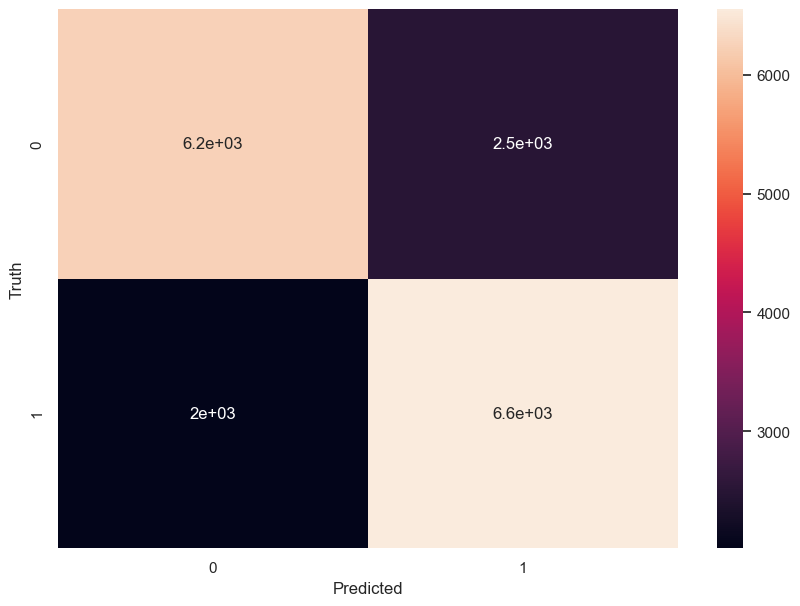

In [24]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sn
plt.figure(figsize=(10,7))
sn.heatmap(cm, annot=True)
plt.xlabel('Predicted')
plt.ylabel('Truth')

### Performance Evaluation (Validation) - SVM

In [25]:
tn, fp, fn, tp = cm.ravel()

# Compute the performance metrics
missrate = fn / (fn + tp)
sensitivity = tp / (tp + fn)
specificity = tn / (tn + fp)
ppv = tp / (tp + fp)
npv = tn / (tn + fn)
fpr = fp / (fp + tn)
fnr = fn / (fn + tp)
f1 = 2 * (ppv * sensitivity) / (ppv + sensitivity)

# Print the results
print(f"Miss rate: {missrate:.4f}")
print(f"Sensitivity: {sensitivity:.4f}")
print(f"Specificity: {specificity:.4f}")
print(f"Positive predictive value: {ppv:.4f}")
print(f"Negative predictive value: {npv:.4f}")
print(f"False positive rate: {fpr:.4f}")
print(f"False negative rate: {fnr:.4f}")
print(f"F1 score: {f1:.4f}")

Miss rate: 0.2354
Sensitivity: 0.7646
Specificity: 0.7139
Positive predictive value: 0.7238
Negative predictive value: 0.7557
False positive rate: 0.2861
False negative rate: 0.2354
F1 score: 0.7436


# Module 4 - ANN Model

In [26]:

classifier = Sequential()
classifier.add(Dense(units=6, kernel_initializer='uniform', activation='relu', input_dim=train_X_norm.shape[1]))
classifier.add(Dense(units=6, kernel_initializer='uniform', activation='relu'))
classifier.add(Dense(units=1, kernel_initializer='uniform', activation='sigmoid'))
classifier.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Train ANN
classifier.fit(train_X_norm, train_y, batch_size=10, epochs=25)

# Predict test set results
y_pred2 = classifier.predict(test_X_norm)
for i in range(len(y_pred2)):
    if(y_pred2[i] > 0.5):
        y_pred2[i] = 1
    else:
        y_pred2[i] = 0
accuracy = accuracy_score(test_y, y_pred2)
print("Accuracy: {:.2f}%".format(accuracy*100))

Epoch 1/25
4038/4038 [==============================] - 8s 2ms/step - loss: 0.5895 - accuracy: 0.6918
Epoch 2/25
4038/4038 [==============================] - 6s 1ms/step - loss: 0.5393 - accuracy: 0.7305
Epoch 3/25
4038/4038 [==============================] - 6s 1ms/step - loss: 0.5319 - accuracy: 0.7331
Epoch 4/25
4038/4038 [==============================] - 5s 1ms/step - loss: 0.5304 - accuracy: 0.7345
Epoch 5/25
4038/4038 [==============================] - 6s 1ms/step - loss: 0.5298 - accuracy: 0.7331
Epoch 6/25
4038/4038 [==============================] - 6s 1ms/step - loss: 0.5289 - accuracy: 0.7345
Epoch 7/25
4038/4038 [==============================] - 6s 1ms/step - loss: 0.5283 - accuracy: 0.7341
Epoch 8/25
4038/4038 [==============================] - 6s 2ms/step - loss: 0.5281 - accuracy: 0.7342
Epoch 9/25
4038/4038 [==============================] - 6s 1ms/step - loss: 0.5276 - accuracy: 0.7337
Epoch 10/25
4038/4038 [==============================] - 7s 2ms/step - loss: 0.527

### Confusion Matrix - ANN

In [27]:
classifier.save('ann.h5')

from sklearn.metrics import confusion_matrix
cm = confusion_matrix(test_y, y_pred2)
cm

array([[6022, 2716],
       [1829, 6738]], dtype=int64)

Text(92.25, 0.5, 'Truth')

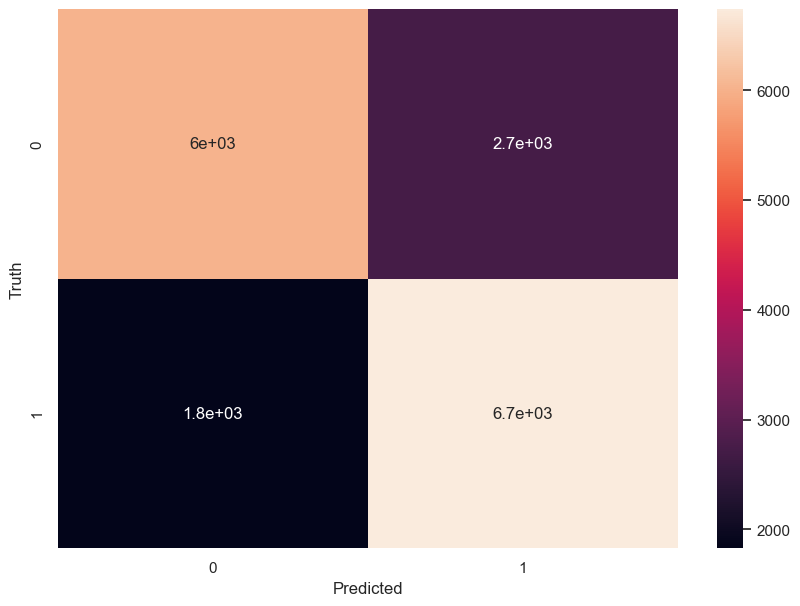

In [28]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sn
plt.figure(figsize=(10,7))
sn.heatmap(cm, annot=True)
plt.xlabel('Predicted')
plt.ylabel('Truth')

### Performance Evaluation (Validation) - ANN

In [29]:
tn, fp, fn, tp = cm.ravel()

# Compute the performance metrics
missrate = fn / (fn + tp)
sensitivity = tp / (tp + fn)
specificity = tn / (tn + fp)
ppv = tp / (tp + fp)
npv = tn / (tn + fn)
fpr = fp / (fp + tn)
fnr = fn / (fn + tp)
f1 = 2 * (ppv * sensitivity) / (ppv + sensitivity)

# Print the results
print(f"Miss rate: {missrate:.4f}")
print(f"Sensitivity: {sensitivity:.4f}")
print(f"Specificity: {specificity:.4f}")
print(f"Positive predictive value: {ppv:.4f}")
print(f"Negative predictive value: {npv:.4f}")
print(f"False positive rate: {fpr:.4f}")
print(f"False negative rate: {fnr:.4f}")
print(f"F1 score: {f1:.4f}")

Miss rate: 0.2135
Sensitivity: 0.7865
Specificity: 0.6892
Positive predictive value: 0.7127
Negative predictive value: 0.7670
False positive rate: 0.3108
False negative rate: 0.2135
F1 score: 0.7478


## FUZZY LOGIC

In [30]:
# pip install -U scikit-fuzzy

In [31]:
import numpy as np
import skfuzzy as fuzz
from skfuzzy import control as ctrl
from tensorflow.keras.models import load_model


In [32]:
import pickle

# Load the saved pickle model from a file
with open('svm.pkl', 'rb') as f:
    svm_model = joblib.load(f)
ann_model=load_model('ann.h5')


# Create input variables for SVM and ANN models
svm_output = ctrl.Antecedent(np.arange(0, 1.01, 0.01), 'svm_input')
ann_output = ctrl.Antecedent(np.arange(0, 1.01, 0.01), 'ann_input')

# Create output variable for the fused model
diabetes_prediction = ctrl.Consequent(np.arange(0, 1.01, 0.01), 'diabetes_prediction')

svm_output.automf(3)
ann_output.automf(3)
diabetes_prediction.automf(3)

C:\Users\aswat\anaconda3\lib\site-packages\skfuzzy\control\fuzzyvariable.py:122: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


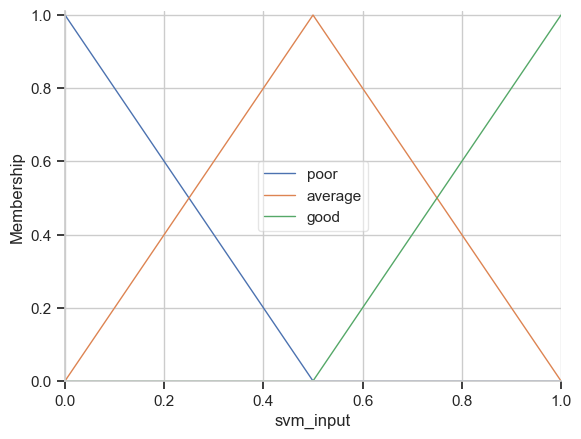

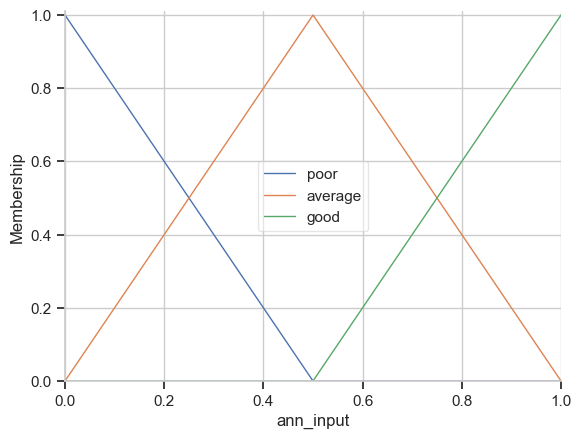

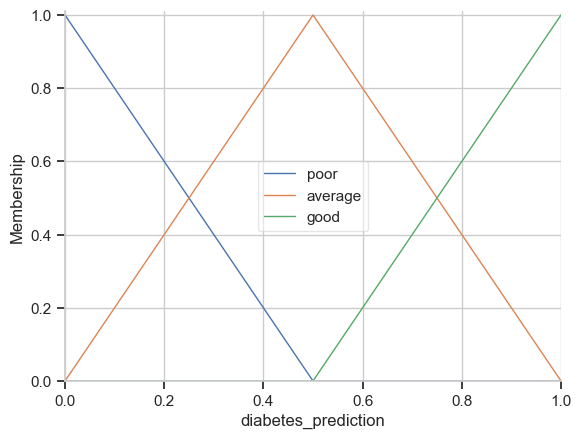

In [33]:
# Create fuzzy sets for input and output variables
# svm_output['low'] = fuzz.trimf(svm_output.universe, [0, 0, 0.5])
# svm_output['medium'] = fuzz.trimf(svm_output.universe, [0, 0.5, 1])
# svm_output['high'] = fuzz.trimf(svm_output.universe, [0.5, 1, 1])

# ann_output['low'] = fuzz.trimf(ann_output.universe, [0, 0, 0.5])
# ann_output['medium'] = fuzz.trimf(ann_output.universe, [0, 0.5, 1])
# ann_output['high'] = fuzz.trimf(ann_output.universe, [0.5, 1, 1])

# diabetes_prediction['low'] = fuzz.trimf(diabetes_prediction.universe, [0, 0, 0.5])
# diabetes_prediction['medium'] = fuzz.trimf(diabetes_prediction.universe, [0, 0.5, 1])
# diabetes_prediction['high'] = fuzz.trimf(diabetes_prediction.universe, [0.5, 1, 1])

svm_output.view()
ann_output.view()
diabetes_prediction.view()

In [34]:
# # Define fuzzy rules for the fused model
# rule1 = ctrl.Rule(svm_output['low'] & ann_output['low'], diabetes_prediction['low'])
# rule2 = ctrl.Rule(svm_output['low'] & ann_output['medium'], diabetes_prediction['medium'])
# rule3 = ctrl.Rule(svm_output['low'] & ann_output['high'], diabetes_prediction['high'])
# rule4 = ctrl.Rule(svm_output['medium'] & ann_output['low'], diabetes_prediction['medium'])
# rule5 = ctrl.Rule(svm_output['medium'] & ann_output['medium'], diabetes_prediction['medium'])
# rule6 = ctrl.Rule(svm_output['medium'] & ann_output['high'], diabetes_prediction['high'])
# rule7 = ctrl.Rule(svm_output['high'] & ann_output['low'], diabetes_prediction['high'])
# rule8 = ctrl.Rule(svm_output['high'] & ann_output['medium'], diabetes_prediction['high'])
# rule9 = ctrl.Rule(svm_output['high'] & ann_output['high'], diabetes_prediction['high'])





In [35]:
rule1 = ctrl.Rule(svm_output['poor'] & ann_output['poor'], diabetes_prediction['poor'])
rule2 = ctrl.Rule(svm_output['poor'] & ann_output['average'], diabetes_prediction['average'])
rule3 = ctrl.Rule(svm_output['poor'] & ann_output['good'], diabetes_prediction['good'])
rule4 = ctrl.Rule(svm_output['average'] & ann_output['poor'], diabetes_prediction['average'])
rule5 = ctrl.Rule(svm_output['average'] & ann_output['average'], diabetes_prediction['average'])
rule6 = ctrl.Rule(svm_output['average'] & ann_output['good'], diabetes_prediction['average'])
rule7 = ctrl.Rule(svm_output['good'] & ann_output['poor'], diabetes_prediction['good'])
rule8 = ctrl.Rule(svm_output['good'] & ann_output['average'], diabetes_prediction['good'])
rule9 = ctrl.Rule(svm_output['good'] & ann_output['good'], diabetes_prediction['good'])


In [36]:
fuzzy_system = ctrl.ControlSystem([rule1, rule2, rule3, rule4, rule5, rule6, rule7, rule8, rule9])

simulation = ctrl.ControlSystemSimulation(fuzzy_system)

svm_output_val = svm_model.predict(test_X_norm)  # replace X_test with your test data for SVM
ann_output_val = ann_model.predict(test_X_norm)  # replace X_test with your test data for ANN
#print(ann_output_val)
svm_output_val = np.array(svm_output_val)  # Example input array
svm_output_val = svm_output_val.reshape(-1, 1)
simulation.input['svm_input'] = svm_output_val
simulation.input['ann_input'] = ann_output_val

simulation.compute()

fused_prediction = simulation.output['diabetes_prediction']
print(fused_prediction)


541/541 [==============================] - 1s 1ms/step
[[0.47997443]
 [0.45842249]
 [0.49462836]
 ...
 [0.45487716]
 [0.82578063]
 [0.25004801]]


In [37]:
#print(fused_prediction[1])
for i in range(len(fused_prediction)):
    if fused_prediction[i]>0.5:
        fused_prediction[i]=1
    else:
        fused_prediction[i]=0
counter = 0

for i in range(len(test_y)):
    if fused_prediction[i] == test_y.iloc[i]:
        counter += 1
print("Accuracy: ", (counter)/len(test_y)*100)

Accuracy: 79.15804680728112


# DECISION TREE

In [38]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

# Create decision tree classifier with entropy as criterion
dtc = DecisionTreeClassifier(criterion='entropy')

# Train the classifier on the training set
dtc.fit(train_X, train_y)

# Make predictions on the test set
y_pred = dtc.predict(test_X)

# Calculate the accuracy of the model
accuracy = accuracy_score(test_y, y_pred)

# Print the accuracy
print("Accuracy: {:.2f}%".format(accuracy*100))


Accuracy: 65.94%


In [39]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

# Create random forest classifier with 100 trees
rfc = RandomForestClassifier(n_estimators=100)

# Train the classifier on the training set
rfc.fit(train_X, train_y)

# Make predictions on the test set
y_pred = rfc.predict(test_X)

# Calculate the accuracy of the model
accuracy = accuracy_score(test_y, y_pred)

# Print the accuracy
print("Accuracy: {:.2f}%".format(accuracy*100))


Accuracy: 70.55%
